In [2]:
!pip install medmnist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 5.7 MB/s eta 0:00:00


In [77]:
# Carga de librerías
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

import medmnist

In [78]:
# Carga de módulos
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

from medmnist import OCTMNIST
from medmnist import INFO

from tensorflow.keras.callbacks import EarlyStopping

In [79]:
# Cargar dataset OCTMNIST
train_dataset = OCTMNIST(split='train', download=True)
val_dataset   = OCTMNIST(split='val', download=True)
test_dataset  = OCTMNIST(split='test', download=True)

In [80]:
# Extraer imágenes y etiquetas
x_train, y_train = train_dataset.imgs, train_dataset.labels
x_val,   y_val   = val_dataset.imgs, val_dataset.labels
x_test,  y_test  = test_dataset.imgs, test_dataset.labels

# Revisar dimensiones
print("Train:", x_train.shape, y_train.shape)
print("Val:  ", x_val.shape,   y_val.shape)
print("Test: ", x_test.shape,  y_test.shape)

Train: (97477, 28, 28) (97477, 1)
Val:   (10832, 28, 28) (10832, 1)
Test:  (1000, 28, 28) (1000, 1)


In [81]:
# Reshape a 4D: (batch, width, height, channels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val   = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_test  = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Ver dimensiones
print("Train:", x_train.shape)
print("Val:  ", x_val.shape)
print("Test: ", x_test.shape)

Train: (97477, 28, 28, 1)
Val:   (10832, 28, 28, 1)
Test:  (1000, 28, 28, 1)


In [82]:
# Normalizar a [0,1]
x_train = x_train.astype('float32') / 255.0
x_val   = x_val.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

In [83]:
# Representación one-hot (categorical)
y_train = to_categorical(y_train, num_classes=4)
y_val   = to_categorical(y_val, num_classes=4)
y_test  = to_categorical(y_test, num_classes=4)

print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


y_train shape: (97477, 4)
y_val shape: (10832, 4)
y_test shape: (1000, 4)


MODELO 1

In [84]:
# Hiperparámetros 1
batch_s = 128
lr = 0.0001
num_epochs = 20
optimizerf = tf.keras.optimizers.Adam(learning_rate=lr)

In [85]:
# Modelo MLP

modelo = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])


In [86]:
modelo.compile(
    optimizer=optimizerf,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [87]:
# Entrenamiento en Hiperparámetros 1
history = modelo.fit(
    x_train, y_train,
    epochs=num_epochs,
    batch_size=batch_s,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/20
762/762 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.5571 - loss: 1.0748 - val_accuracy: 0.6604 - val_loss: 0.8988
Epoch 2/20
762/762 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.6774 - loss: 0.8628 - val_accuracy: 0.7085 - val_loss: 0.7852
Epoch 3/20
762/762 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7181 - loss: 0.7702 - val_accuracy: 0.7353 - val_loss: 0.7200
Epoch 4/20
762/762 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7493 - loss: 0.6909 - val_accuracy: 0.7669 - val_loss: 0.6506
Epoch 5/20
762/762 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7711 - loss: 0.6391 - val_accuracy: 0.7782 - val_loss: 0.6203
Epoch 6/20
762/762 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.7802 - loss: 0.6095 - val_accuracy: 0.7721 - val_loss: 0.6325
Epoch 7/20
762/762 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7905 - loss: 0.5845 - val_accuracy: 0.7948 - val_loss: 0.5743
Epoch 8/20
762/762 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8025 - loss: 0.5545 - 

In [88]:
# ESTRUCTURA DEL MODELO

modelo.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,982 (6.48 MB)

 Trainable params: 566,660 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,133,322 (4.32 MB)

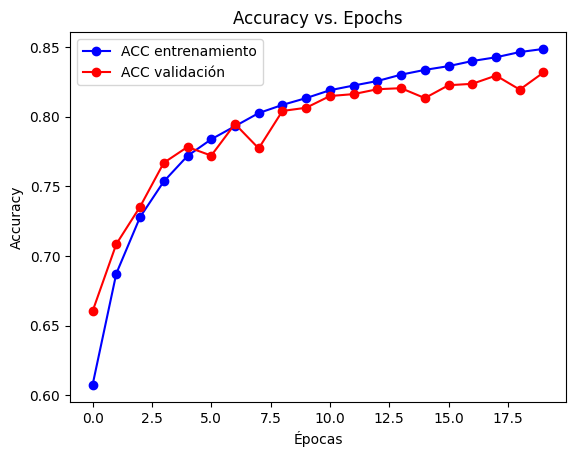

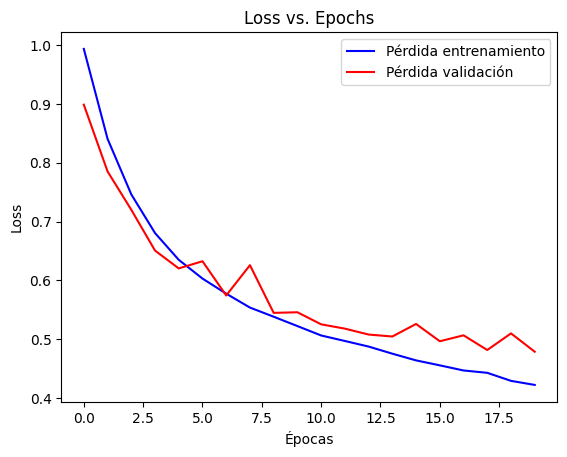

In [89]:
# Gráfica de Accuracy (train vs val)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='ACC entrenamiento')
plt.plot(epochs, val_acc, 'ro-', label='ACC validación')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gráfica de Loss (train vs val)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b-', label='Pérdida entrenamiento')
plt.plot(epochs, val_loss, 'r-', label='Pérdida validación')
plt.title('Loss vs. Epochs')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


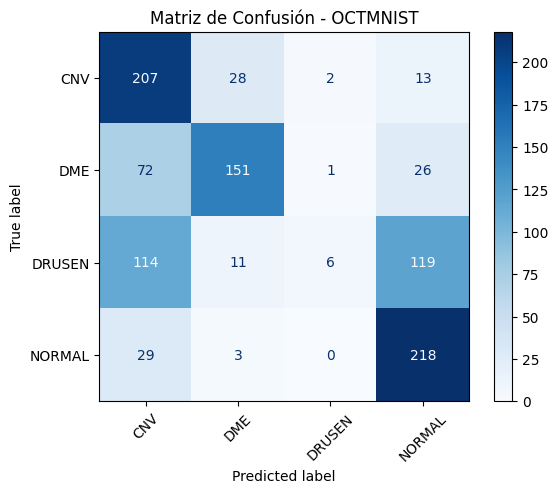

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas verdaderas y predichas
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(modelo.predict(x_test), axis=1)

# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrarla como gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_names.values()))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de Confusión - OCTMNIST")
plt.show()


MODELO 2

In [91]:
# Hiperparámetros 2
batch_s = 128
lr = 0.0005
num_epochs = 50
optimizerf = tf.keras.optimizers.Nadam(learning_rate=lr)


# Definir EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [92]:
# Modelo MLP

modelo = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
modelo.compile(
    optimizer=optimizerf,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [94]:
# Entrenamiento Hiperparámetros 2
history = modelo.fit(
    x_train, y_train,
    epochs=num_epochs,
    batch_size=batch_s,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],   # << aquí entra EarlyStopping
    verbose=1
)

Epoch 1/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.6028 - loss: 0.9921 - val_accuracy: 0.7097 - val_loss: 0.7790
Epoch 2/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7330 - loss: 0.7321 - val_accuracy: 0.7650 - val_loss: 0.6527
Epoch 3/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7705 - loss: 0.6383 - val_accuracy: 0.7803 - val_loss: 0.6033
Epoch 4/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7886 - loss: 0.5888 - val_accuracy: 0.7948 - val_loss: 0.5738
Epoch 5/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7982 - loss: 0.5567 - val_accuracy: 0.8023 - val_loss: 0.5587
Epoch 6/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8096 - loss: 0.5319 - val_accuracy: 0.8086 - val_loss: 0.5361
Epoch 7/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8183 - loss: 0.5077 - val_accuracy: 0.8083 - val_loss: 0.5375
Epoch 8/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8236 - loss: 0.4876 - 

In [95]:
# ESTRUCTURA DEL MODELO

modelo.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,983 (6.48 MB)

 Trainable params: 566,660 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,133,323 (4.32 MB)

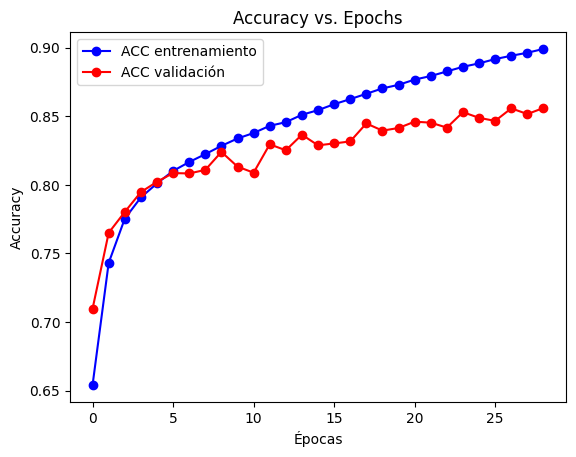

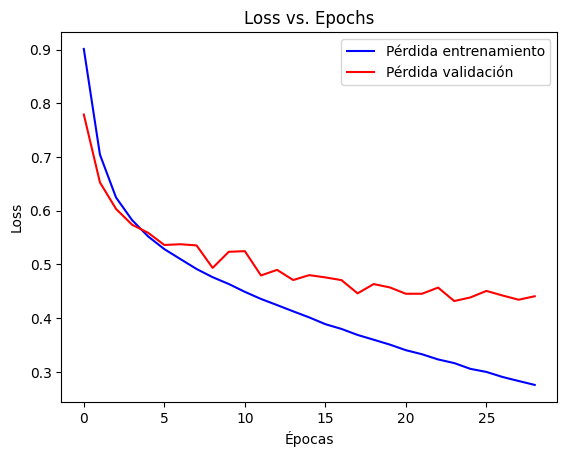

In [96]:
# Gráfica de Accuracy (train vs val)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='ACC entrenamiento')
plt.plot(epochs, val_acc, 'ro-', label='ACC validación')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gráfica de Loss (train vs val)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b-', label='Pérdida entrenamiento')
plt.plot(epochs, val_loss, 'r-', label='Pérdida validación')
plt.title('Loss vs. Epochs')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


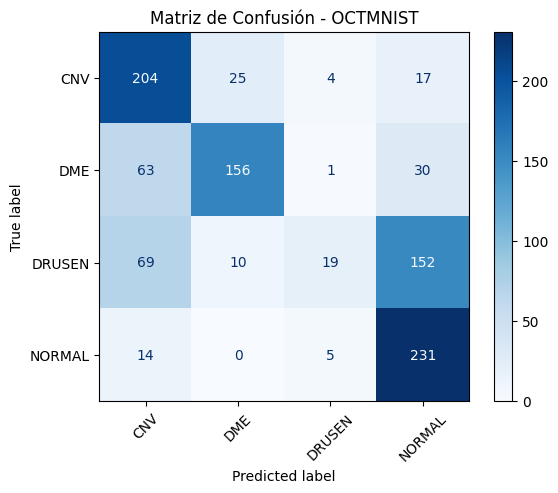

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas verdaderas y predichas
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(modelo.predict(x_test), axis=1)

# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrarla como gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_names.values()))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de Confusión - OCTMNIST")
plt.show()


MODELO 3

In [98]:
# Hiperparámetros iniciales 3
batch_s = 64
lr = 0.001
num_epochs = 25
optimizerf = tf.keras.optimizers.Adam(learning_rate=lr)

In [99]:
# Modelo MLP

modelo = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
modelo.compile(
    optimizer=optimizerf,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [101]:
# Entrenamiento en Hiperparámetros 3
history = modelo.fit(
    x_train, y_train,
    epochs=num_epochs,
    batch_size=batch_s,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/25
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5938 - loss: 1.0077 - val_accuracy: 0.6727 - val_loss: 0.8629
Epoch 2/25
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7143 - loss: 0.7744 - val_accuracy: 0.7275 - val_loss: 0.7321
Epoch 3/25
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7483 - loss: 0.6851 - val_accuracy: 0.7561 - val_loss: 0.6702
Epoch 4/25
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7704 - loss: 0.6342 - val_accuracy: 0.7855 - val_loss: 0.6033
Epoch 5/25
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7817 - loss: 0.6011 - val_accuracy: 0.7840 - val_loss: 0.6156
Epoch 6/25
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7941 - loss: 0.5714 - val_accuracy: 0.7891 - val_loss: 0.5820
Epoch 7/25
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7998 - loss: 0.5555 - val_accuracy: 0.8048 - val_loss: 0.5464
Epoch 8/25
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8023 -

In [102]:
# ESTRUCTURA DEL MODELO

modelo.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,982 (6.48 MB)

 Trainable params: 566,660 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,133,322 (4.32 MB)

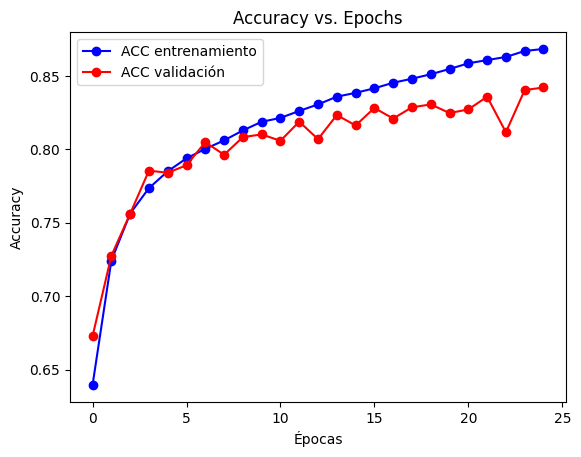

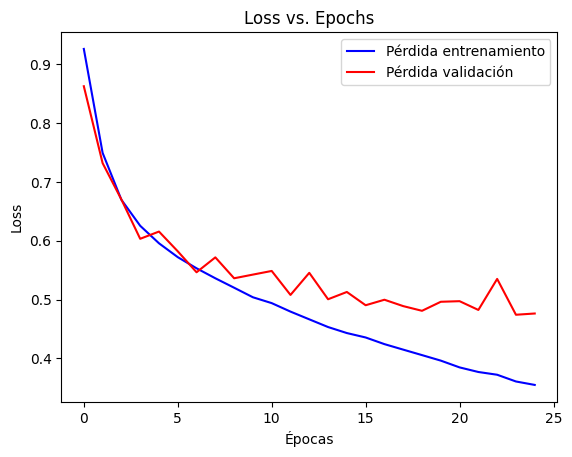

In [103]:
# Gráfica de Accuracy (train vs val)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='ACC entrenamiento')
plt.plot(epochs, val_acc, 'ro-', label='ACC validación')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gráfica de Loss (train vs val)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b-', label='Pérdida entrenamiento')
plt.plot(epochs, val_loss, 'r-', label='Pérdida validación')
plt.title('Loss vs. Epochs')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


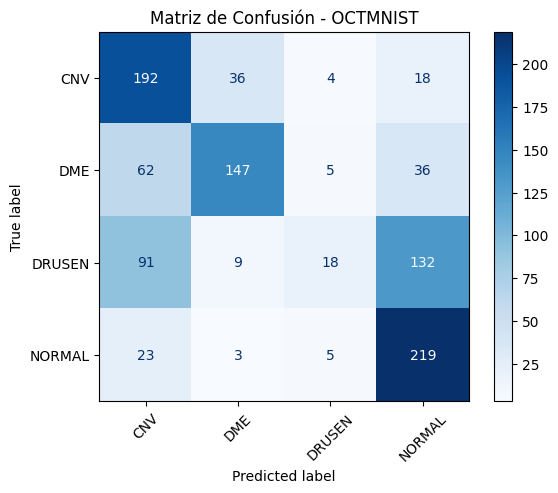

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas verdaderas y predichas
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(modelo.predict(x_test), axis=1)

# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrarla como gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_names.values()))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de Confusión - OCTMNIST")
plt.show()